In [2]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib.legend_handler import HandlerLine2D

# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc,roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from xgboost import XGBClassifier
from xgboost import XGBRegressor

#import pickle

import shap

In [3]:
# Load the original data file
df = pd.read_csv(r'encoded_data\final_dataset.csv')
df

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_institute_age_years,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y,job_change,job_change_horizon
0,5,4,214,55,4,36,1,1,6,21,...,0,0,48,168,108.000000,216,2,0.000000,0,0
1,4,3,72,26,4,36,1,1,4,9,...,0,0,12,156,72.000000,216,3,0.222222,1,1
2,6,1,114,8,0,0,0,0,5,21,...,17,0,0,156,45.600000,228,5,0.000000,0,0
3,7,3,218,29,0,0,0,0,8,9,...,140,0,12,60,36.000000,72,2,0.000000,0,0
4,7,1,97,13,3,0,0,1,5,7,...,0,0,0,168,51.000000,204,4,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,4,10,46,9,2,20,0,0,5,87,...,158,0,0,24,30.770300,40,7,0.000000,0,0
1317,3,3,97,22,0,0,0,0,7,9,...,7,0,12,156,68.295941,228,3,0.000000,0,0
1318,5,3,105,35,4,36,1,1,5,14,...,50,0,0,162,35.839993,216,4,0.000000,0,0
1319,10,2,114,5,4,36,1,1,5,18,...,28,0,12,175,40.516883,220,3,0.000000,0,0


In [4]:
# pd.set_option('display.max_columns', None)
df.describe()

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_institute_age_years,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y,job_change,job_change_horizon
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,...,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,5.000757,2.808478,134.698713,35.372445,2.546556,29.474640,0.520818,0.589705,4.722180,26.724451,...,47.579864,0.180924,14.335352,88.375473,42.801066,135.881908,2.997729,0.158192,0.239970,1.031037
std,2.513750,2.227334,80.395180,42.409947,1.808521,30.312831,0.499756,0.492074,1.695145,28.485957,...,59.109643,0.385101,17.605578,57.819637,27.524927,91.498657,1.458775,0.293799,0.427226,2.332207
min,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,78.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000,...,0.000000,0.000000,0.000000,36.000000,20.986288,60.000000,2.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,117.000000,17.000000,4.000000,36.000000,1.000000,1.000000,5.000000,18.000000,...,10.000000,0.000000,12.000000,84.000000,40.000000,128.000000,3.000000,0.000000,0.000000,0.000000
75%,6.000000,3.000000,189.000000,46.000000,4.000000,36.000000,1.000000,1.000000,6.000000,31.000000,...,108.000000,0.000000,24.000000,156.000000,61.919658,208.000000,4.000000,0.200728,0.000000,0.000000
max,15.000000,10.000000,457.000000,265.000000,4.000000,214.000000,1.000000,1.000000,10.000000,234.000000,...,187.000000,1.000000,180.000000,228.000000,180.000000,564.000000,10.000000,1.000000,1.000000,11.000000


In [5]:
# Correlations of features with target variable
correlations=df.corr()
correlations['job_change']

number_of_jobs                  -0.055897
first_job_level                 -0.092580
first_job_recency_months        -0.221878
first_job_duration_months       -0.110010
first_company_size              -0.045356
first_company_age_years          0.007695
first_company_apparel           -0.156473
first_company_sri_lankan        -0.097068
last_job_level                  -0.215419
last_job_recency_months         -0.110534
last_job_duration_months        -0.102709
last_company_size               -0.070724
last_company_age_years          -0.035604
last_company_apparel            -0.114815
last_company_sri_lankan         -0.089914
minimum_job_duration_months     -0.092270
maximum_job_duration_months     -0.220047
average_job_duration_months     -0.192333
total_job_duration_months       -0.257562
number of turnovers              0.147587
number of companies              0.142601
number of levelups              -0.154538
total levelups                  -0.058368
average years for levelup       -0

In [6]:
df1 = df.drop(['number_of_jobs',
       'first_job_duration_months', 'first_company_size',
       'first_company_age_years', 'first_company_apparel',
       'first_company_sri_lankan',
       'last_company_size',
       'last_company_age_years', 'last_company_apparel',
       'last_company_sri_lankan', 'minimum_job_duration_months',
       'maximum_job_duration_months',
       'total_job_duration_months',
       'number of companies', 'total levelups',
       'average years for levelup',
       'number of lateral movements',
       'duration ratio in apparel',
       'number_of_Qualifications', 'first_qual_level',
       'first_qual_recency_months', 'first_qual_duration_months',
       'first_institute_size', 'first_institute_age_years',
       'first_institute_sri_lankan', 'last_qual_level',
       'last_qual_recency_months', 'last_qual_duration_months',
       'last_institute_sri_lankan', 'minimum_qual_duration_months',
       'maximum_qual_duration_months', 'average_qual_duration_months',
       'total_qual_duration_months', 'number_of_institutes',
       'duration ratio in sri lanka_y', 'job_change','job_change_horizon'], axis=1)
df1

,first_job_level,first_job_recency_months,last_job_level,last_job_recency_months,last_job_duration_months,average_job_duration_months,number of turnovers,number of levelups,total LUs within company,total LUs outside company,duration ratio in sri lanka_x,last_institute_size,last_institute_age_years
0,4,214,6,21,32,43.600000,0,2,2,0,1.000000,0,0
1,3,72,4,9,10,18.750000,0,1,1,0,1.000000,0,0
2,1,114,5,21,33,18.666667,2,3,4,0,0.812500,0,17
3,3,218,8,9,19,45.000000,1,3,5,0,0.907937,5,140
4,1,97,5,7,18,13.285714,4,4,1,3,0.677419,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,10,46,5,87,28,17.022045,3,2,2,-1,1.000000,4,158
1317,3,97,7,9,27,20.135939,1,1,0,0,0.187232,0,7
1318,3,105,5,14,21,17.225669,1,2,2,0,1.000000,4,50
1319,2,114,5,18,27,25.852573,5,1,2,0,1.000000,1,28


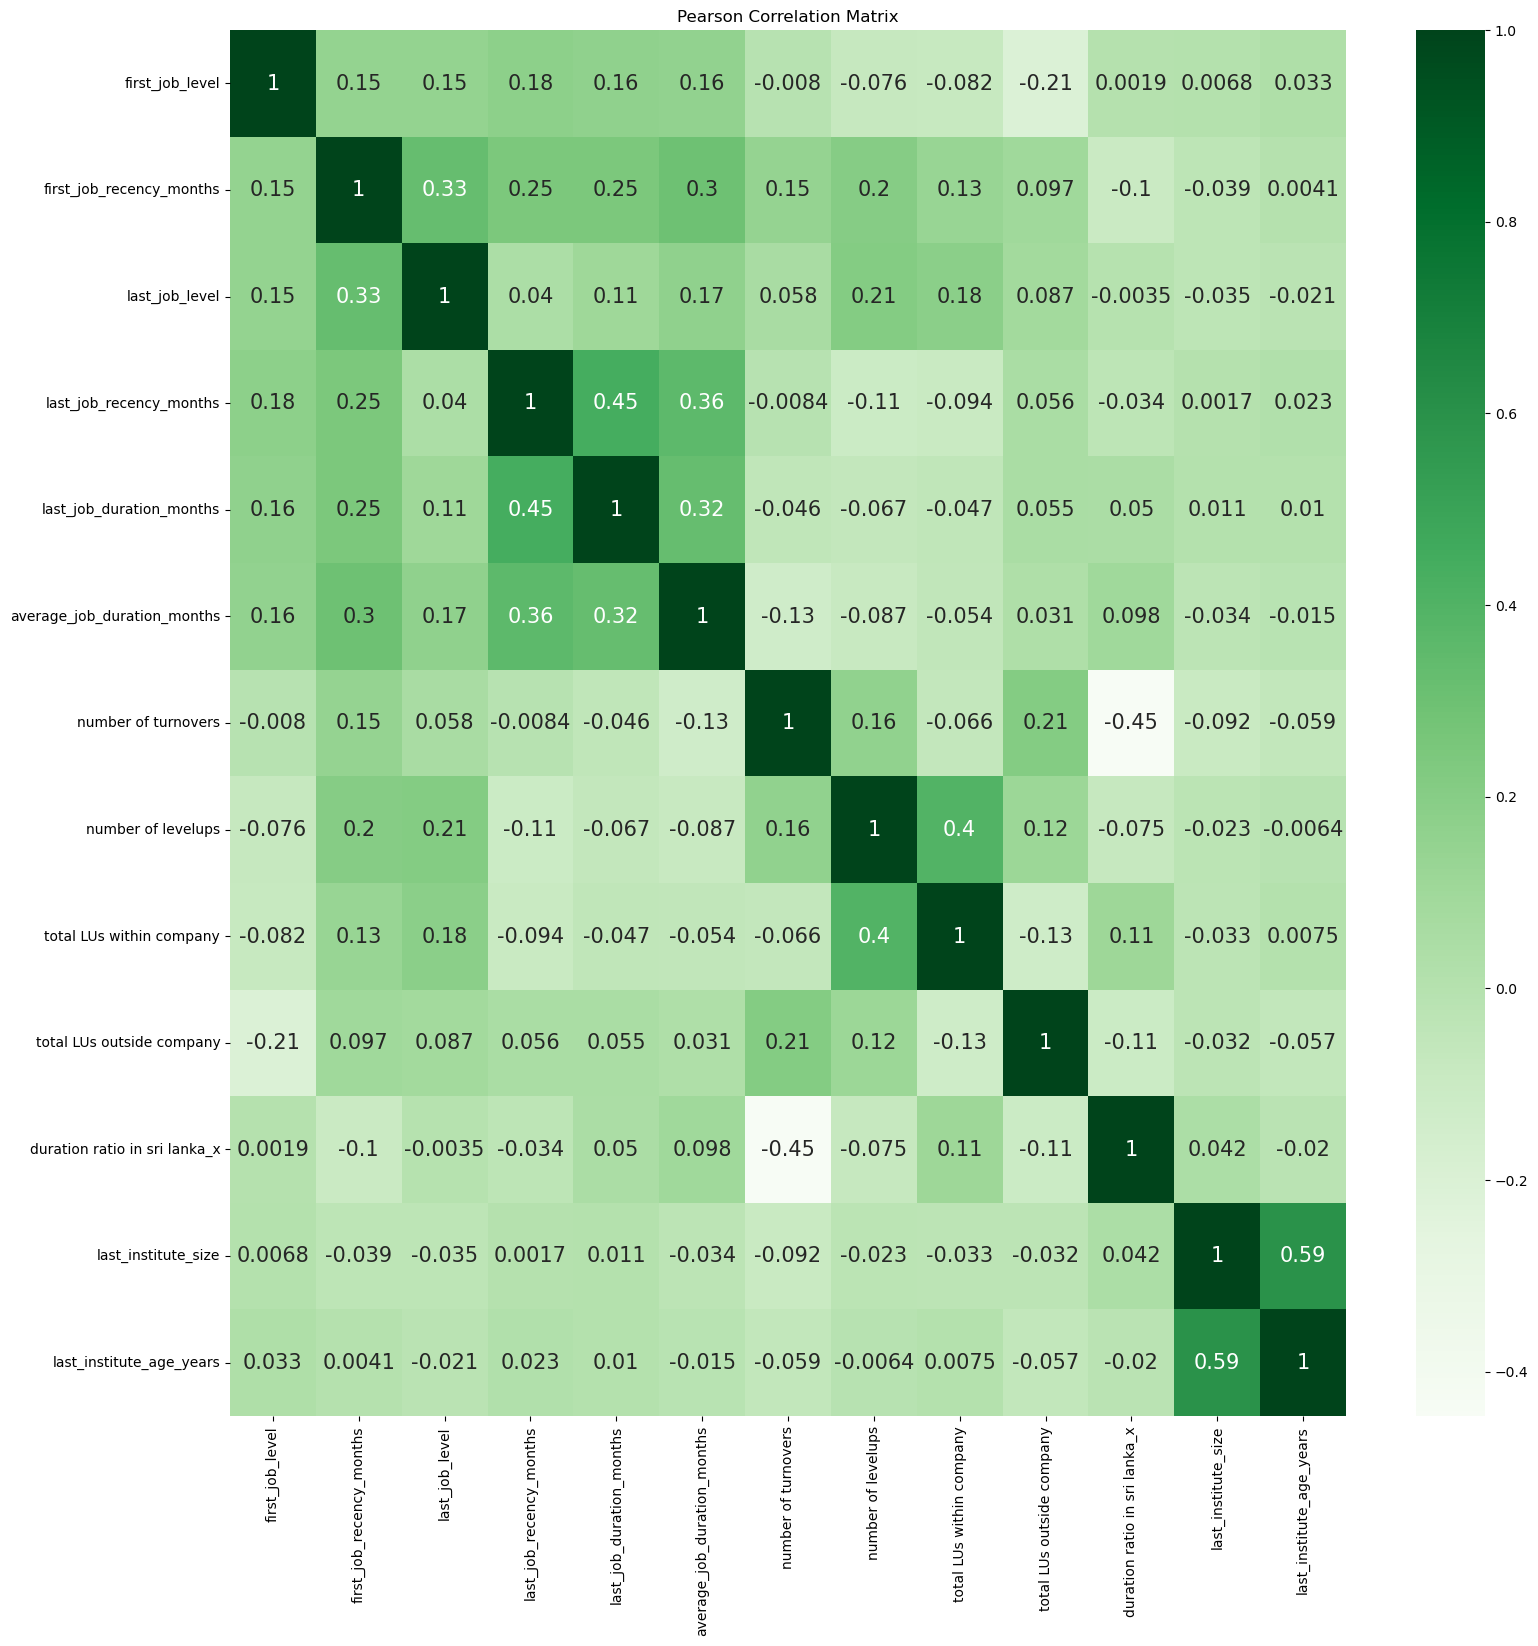

In [7]:
# Plot Pearson correlation matrix

import seaborn as sns

fig_2=plt.figure(figsize=(18,18))
new_correlations=df1.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size':15})
plt.title('Pearson Correlation Matrix')
plt.show()

In [8]:
df.columns

Index(['number_of_jobs', 'first_job_level', 'first_job_recency_months',
       'first_job_duration_months', 'first_company_size',
       'first_company_age_years', 'first_company_apparel',
       'first_company_sri_lankan', 'last_job_level', 'last_job_recency_months',
       'last_job_duration_months', 'last_company_size',
       'last_company_age_years', 'last_company_apparel',
       'last_company_sri_lankan', 'minimum_job_duration_months',
       'maximum_job_duration_months', 'average_job_duration_months',
       'total_job_duration_months', 'number of turnovers',
       'number of companies', 'number of levelups', 'total levelups',
       'average years for levelup', 'total LUs within company',
       'total LUs outside company', 'number of lateral movements',
       'duration ratio in sri lanka_x', 'duration ratio in apparel',
       'number_of_Qualifications', 'first_qual_level',
       'first_qual_recency_months', 'first_qual_duration_months',
       'first_institute_size', 'fi

In [9]:
# Check the number of outliers using the z-score measure
columns_to_remove_outliers = ['number_of_jobs', 'first_job_recency_months',
       'first_job_duration_months', 'first_company_size',
       'first_company_age_years', 'first_company_apparel',
       'first_company_sri_lankan', 'last_job_level', 'last_job_recency_months',
       'last_job_duration_months', 'last_company_size',
       'last_company_age_years', 'last_company_apparel',
       'last_company_sri_lankan', 'minimum_job_duration_months',
       'maximum_job_duration_months', 'average_job_duration_months',
       'total_job_duration_months', 'number of turnovers',
       'number of companies', 'number of levelups', 'total levelups',
       'average years for levelup', 'total LUs within company',
       'total LUs outside company', 'number of lateral movements',
       'duration ratio in sri lanka_x', 'duration ratio in apparel',
       'number_of_Qualifications', 'first_qual_level',
       'first_qual_recency_months', 'first_qual_duration_months',
       'first_institute_size', 'first_institute_age_years',
       'first_institute_sri_lankan', 'last_qual_level',
       'last_qual_recency_months', 'last_qual_duration_months',
       'last_institute_size', 'last_institute_age_years',
       'last_institute_sri_lankan', 'minimum_qual_duration_months',
       'maximum_qual_duration_months', 'average_qual_duration_months',
       'total_qual_duration_months', 'number_of_institutes',
       'duration ratio in sri lanka_y', 'job_change', 'job_change_horizon']

print("Number of outliers before removal:")
for col in columns_to_remove_outliers:
    outliers_count = len(df) - len(df[(df[col] >= df[col].mean() - 5 * df[col].std()) & (df[col] <= df[col].mean() + 5 * df[col].std())])
    print(f"{col}: {outliers_count}")

Number of outliers before removal:
number_of_jobs: 0
first_job_recency_months: 0
first_job_duration_months: 1
first_company_size: 0
first_company_age_years: 1
first_company_apparel: 0
first_company_sri_lankan: 0
last_job_level: 0
last_job_recency_months: 4
last_job_duration_months: 4
last_company_size: 37
last_company_age_years: 5
last_company_apparel: 49
last_company_sri_lankan: 45
minimum_job_duration_months: 4
maximum_job_duration_months: 0
average_job_duration_months: 3
total_job_duration_months: 2
number of turnovers: 0
number of companies: 1
number of levelups: 0
total levelups: 0
average years for levelup: 2
total LUs within company: 0
total LUs outside company: 2
number of lateral movements: 2
duration ratio in sri lanka_x: 0
duration ratio in apparel: 0
number_of_Qualifications: 0
first_qual_level: 0
first_qual_recency_months: 0
first_qual_duration_months: 0
first_institute_size: 0
first_institute_age_years: 0
first_institute_sri_lankan: 0
last_qual_level: 0
last_qual_recency_

In [10]:
# Define function to remove outliers
def remove_outliers(df, columns, threshold=5):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < threshold)]
    return df

In [11]:
# Remove outliers and store it as a new DataFrame
df_cleaned = remove_outliers(df, columns_to_remove_outliers)
df_cleaned

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_institute_age_years,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y,job_change,job_change_horizon
0,5,4,214,55,4,36,1,1,6,21,...,0,0,48,168,108.000000,216,2,0.000000,0,0
1,4,3,72,26,4,36,1,1,4,9,...,0,0,12,156,72.000000,216,3,0.222222,1,1
2,6,1,114,8,0,0,0,0,5,21,...,17,0,0,156,45.600000,228,5,0.000000,0,0
3,7,3,218,29,0,0,0,0,8,9,...,140,0,12,60,36.000000,72,2,0.000000,0,0
4,7,1,97,13,3,0,0,1,5,7,...,0,0,0,168,51.000000,204,4,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,5,3,107,18,4,33,1,1,3,3,...,120,0,0,60,36.701362,62,3,0.000000,0,0
1316,4,10,46,9,2,20,0,0,5,87,...,158,0,0,24,30.770300,40,7,0.000000,0,0
1317,3,3,97,22,0,0,0,0,7,9,...,7,0,12,156,68.295941,228,3,0.000000,0,0
1319,10,2,114,5,4,36,1,1,5,18,...,28,0,12,175,40.516883,220,3,0.000000,0,0


# Training classification models

In [12]:
X = df_cleaned.drop(["job_change","job_change_horizon"], axis=1)
y = df_cleaned['job_change']

In [25]:
# scaler = MinMaxScaler()
# X_normalised = scaler.fit_transform(X)
# X_normalised

In [13]:
seednumber = 10
shuffle_param = True
np.random.seed(seednumber)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=shuffle_param)

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA = [
    #KNN
    KNeighborsClassifier(3),
    #Trees
    DecisionTreeClassifier(),
    #ensemble
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
    #Navie Bayes
    BernoulliNB(),
    GaussianNB(),
    #GLM
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron()   
    ]

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

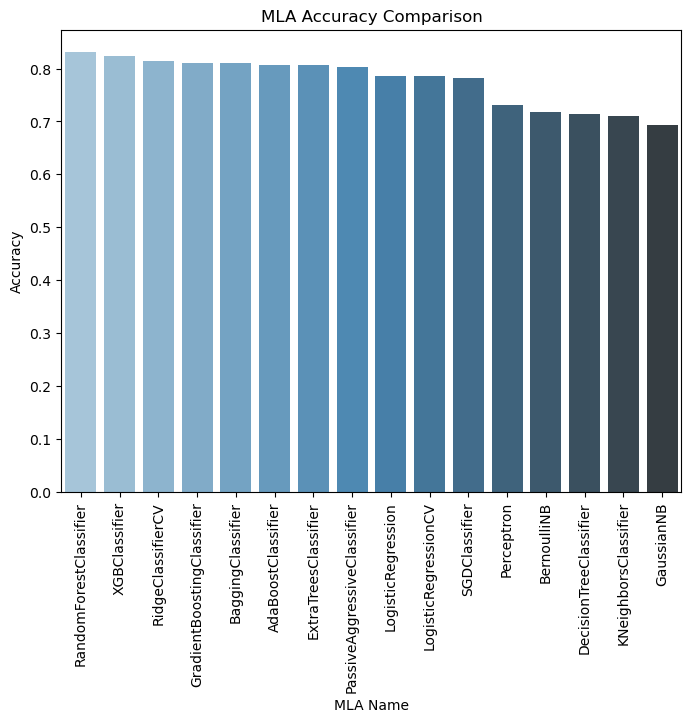

                       MLA Name Accuracy
2        RandomForestClassifier   83.19%
7                 XGBClassifier   82.35%
13            RidgeClassifierCV   81.51%
4    GradientBoostingClassifier   81.09%
5             BaggingClassifier   81.09%
3            AdaBoostClassifier   80.67%
6          ExtraTreesClassifier   80.67%
12  PassiveAggressiveClassifier   80.25%
10           LogisticRegression   78.57%
11         LogisticRegressionCV   78.57%
14                SGDClassifier   78.15%
15                   Perceptron   73.11%
8                   BernoulliNB   71.85%
1        DecisionTreeClassifier   71.43%
0          KNeighborsClassifier   71.01%
9                    GaussianNB   69.33%


In [28]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'MLA Precission'] = precision_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'MLA Recall'] = recall_score(y_test, y_pred)
    row_index+=1

MLA_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Accuracy", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.show()

MLA_compare['Accuracy'] = MLA_compare['Accuracy'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

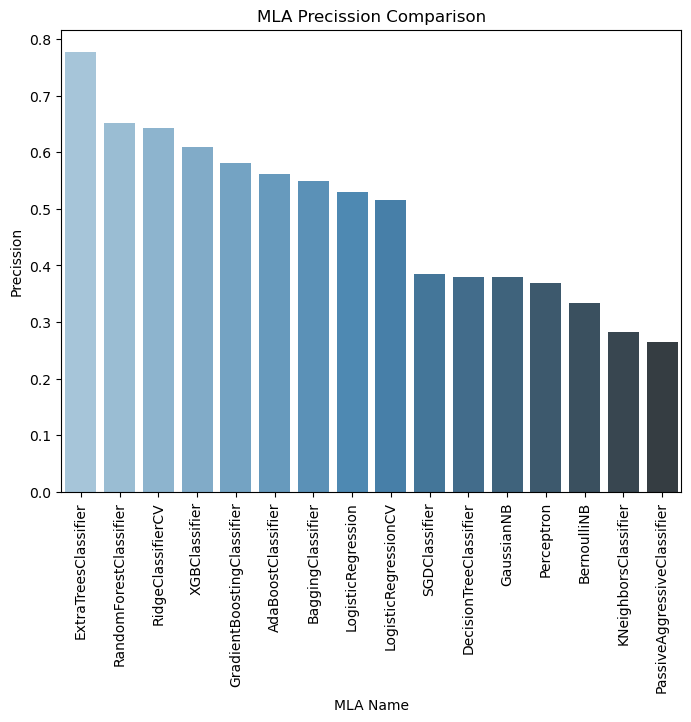

                       MLA Name Accuracy Precission
6          ExtraTreesClassifier   80.67%     77.78%
2        RandomForestClassifier   83.19%     65.22%
13            RidgeClassifierCV   81.51%     64.29%
7                 XGBClassifier   82.35%     60.87%
4    GradientBoostingClassifier   81.09%     58.14%
3            AdaBoostClassifier   80.67%     56.25%
5             BaggingClassifier   81.09%     54.84%
10           LogisticRegression   78.57%     52.94%
11         LogisticRegressionCV   78.57%     51.52%
14                SGDClassifier   78.15%     38.46%
1        DecisionTreeClassifier   71.43%     38.03%
9                    GaussianNB   69.33%     37.93%
15                   Perceptron   73.11%     36.96%
8                   BernoulliNB   71.85%     33.33%
0          KNeighborsClassifier   71.01%     28.21%
12  PassiveAggressiveClassifier   80.25%     26.45%


In [29]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    #MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    MLA_compare.loc[row_index,'Precission'] = precision_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'MLA Recall'] = recall_score(y_test, y_pred)
    row_index+=1

MLA_compare.sort_values(by = ['Precission'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Precission", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

MLA_compare['Precission'] = MLA_compare['Precission'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

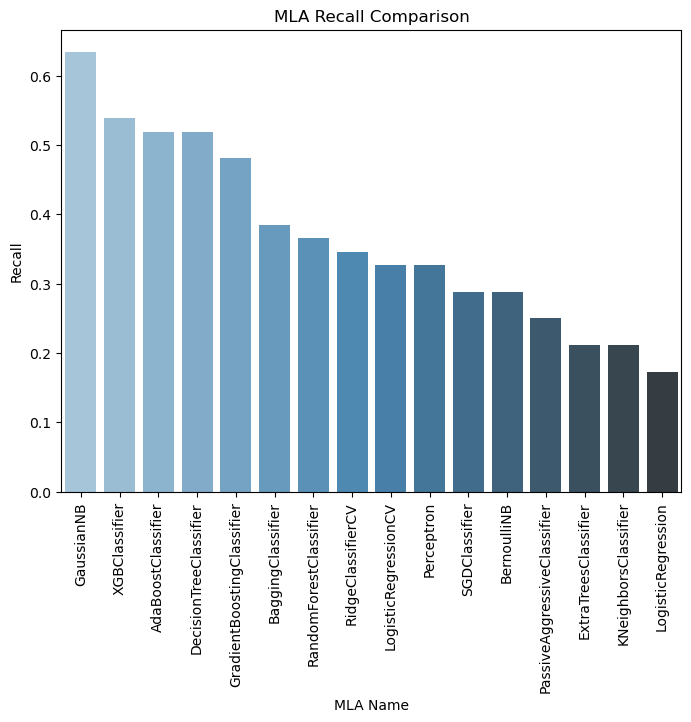

                       MLA Name Accuracy Precission  Recall
9                    GaussianNB   69.33%     37.93%  63.46%
7                 XGBClassifier   82.35%     60.87%  53.85%
3            AdaBoostClassifier   80.67%     56.25%  51.92%
1        DecisionTreeClassifier   71.43%     38.03%  51.92%
4    GradientBoostingClassifier   81.09%     58.14%  48.08%
5             BaggingClassifier   81.09%     54.84%  38.46%
2        RandomForestClassifier   83.19%     65.22%  36.54%
13            RidgeClassifierCV   81.51%     64.29%  34.62%
11         LogisticRegressionCV   78.57%     51.52%  32.69%
15                   Perceptron   73.11%     36.96%  32.69%
14                SGDClassifier   78.15%     38.46%  28.85%
8                   BernoulliNB   71.85%     33.33%  28.85%
12  PassiveAggressiveClassifier   80.25%     26.45%  25.00%
6          ExtraTreesClassifier   80.67%     77.78%  21.15%
0          KNeighborsClassifier   71.01%     28.21%  21.15%
10           LogisticRegression   78.57%

In [30]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    #MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'Precission'] = precision_score(y_test, y_pred)
    MLA_compare.loc[row_index,'Recall'] = recall_score(y_test, y_pred)
    row_index+=1

MLA_compare.sort_values(by = ['Recall'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Recall", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

MLA_compare['Recall'] = MLA_compare['Recall'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

In [14]:
# Defining 3 classification models
gb_clf = GradientBoostingClassifier()

xgb_clf = XGBClassifier()

rf_clf = RandomForestClassifier()

In [15]:
# Defining function to run classification models with frid search
def train_classification_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    print("Best Parameters:", best_params)

    # Use the best estimator to make predictions on the test set
    y_pred = best_estimator.predict(X_test)

    # Print confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [16]:
# Training GBClassifier model
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[171  15]
 [ 25  27]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       186
           1       0.64      0.52      0.57        52

    accuracy                           0.83       238
   macro avg       0.76      0.72      0.73       238
weighted avg       0.82      0.83      0.83       238



In [17]:
gb_param_grid = {
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [100, 150, 200],
        'max_depth': [2, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
}

In [18]:
# Training GBClassifier model with grid search
train_classification_model(gb_clf, gb_param_grid, X_train, y_train, X_test, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.8}
Confusion Matrix:
 [[168  18]
 [ 26  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       186
           1       0.59      0.50      0.54        52

    accuracy                           0.82       238
   macro avg       0.73      0.70      0.71       238
weighted avg       0.81      0.82      0.81       238



SHAP values: [-3.00369614e-04 -1.32997674e-01  3.14225704e-01  2.74425903e-02
  0.00000000e+00 -2.10691605e-02  5.32913670e-02  0.00000000e+00
 -2.67720926e-01  2.00791182e-03 -7.53501703e-02  0.00000000e+00
 -3.43962903e-02  0.00000000e+00  0.00000000e+00  6.56417189e-02
  4.11356630e-03  4.87940144e-01 -7.56041895e-02  3.41394532e-01
  1.81611721e-01 -1.43978367e-01 -1.59527004e-03  7.19271491e-02
  8.48923401e-01  2.11059996e-01 -9.49010324e-03  9.23288379e-01
 -6.73723247e-02 -2.95110922e-02  7.12997127e-02 -1.00998883e-01
  1.24709591e-01  2.15701908e-02  1.79508979e-02 -5.99551617e-04
 -3.93571462e-03 -1.58750701e-01  1.01155310e-02  6.21831641e-02
  2.55733837e-01 -4.63950579e-03  1.38450161e-02 -2.76393813e-02
  1.07372846e-03  1.53747206e-02 -4.46618337e-04 -5.47812796e-02]


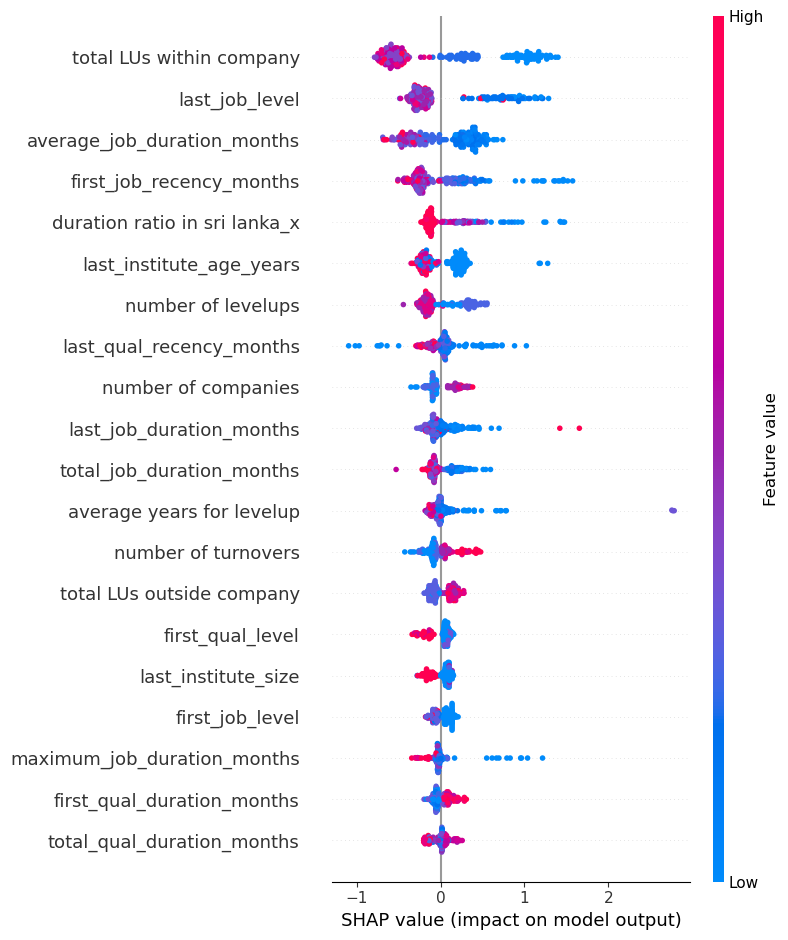

In [19]:
# Create a SHAP explainer
explainer = shap.Explainer(gb_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("SHAP values:", shap_values[0])

# Summary plot for the first instance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [20]:
explainer = shap.TreeExplainer(gb_clf)
shap_values = explainer.shap_values(X_train)
shap.initjs()

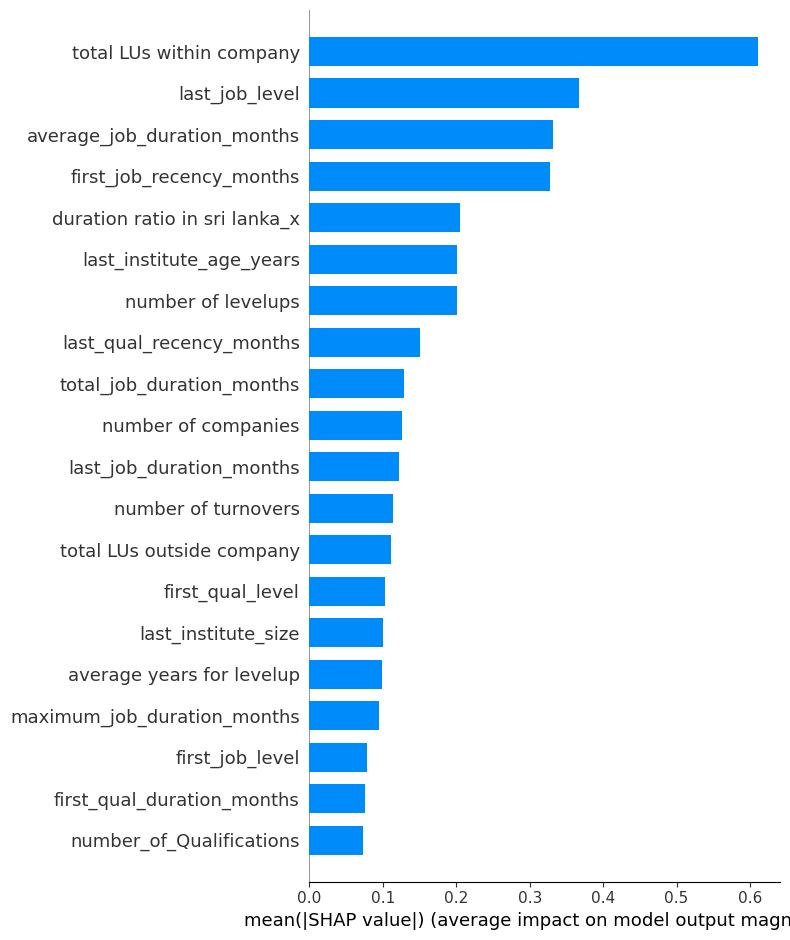

In [21]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [22]:
# Training XGBClassifier model
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[168  18]
 [ 27  25]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       186
           1       0.58      0.48      0.53        52

    accuracy                           0.81       238
   macro avg       0.72      0.69      0.70       238
weighted avg       0.80      0.81      0.80       238



In [23]:
xgb_param_grid = {
        'learning_rate': [0.1, 0.01,0.001],
        'n_estimators': [80, 100, 120],
        'max_depth': [2, 3, 4],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
}

In [24]:
# Training XGBClassifier model with grid search
train_classification_model(xgb_clf, xgb_param_grid, X_train, y_train, X_test, y_test)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 120, 'subsample': 0.8}
Confusion Matrix:
 [[169  17]
 [ 24  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       186
           1       0.62      0.54      0.58        52

    accuracy                           0.83       238
   macro avg       0.75      0.72      0.73       238
weighted avg       0.82      0.83      0.82       238



SHAP values: [ 5.53563274e-02  1.09935254e-01 -1.63331255e-01  4.13300246e-02
  0.00000000e+00 -7.42296994e-01  0.00000000e+00 -7.30971023e-02
 -6.02400064e-01  2.42686778e-01 -5.17424107e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.85788609e-02
 -6.17263496e-01 -5.91041028e-01 -1.37582576e+00  1.77545011e-01
  4.44452539e-02  2.12690961e-02 -1.96751282e-01 -3.48813981e-01
  7.20168412e-01 -1.43942162e-02  1.98357813e-02  1.00287497e+00
  2.44973525e-02 -7.89450202e-03 -1.10739097e-03  1.00350618e-01
 -8.38751718e-02 -7.36263543e-02  1.01539649e-01  1.91183090e-01
  4.60330769e-02  3.67085516e-01  3.20394933e-02 -2.73177892e-01
 -3.66628259e-01  0.00000000e+00  1.11480132e-02 -1.30227923e-01
  3.42454761e-02  6.56743348e-02  0.00000000e+00  1.30305991e-01]


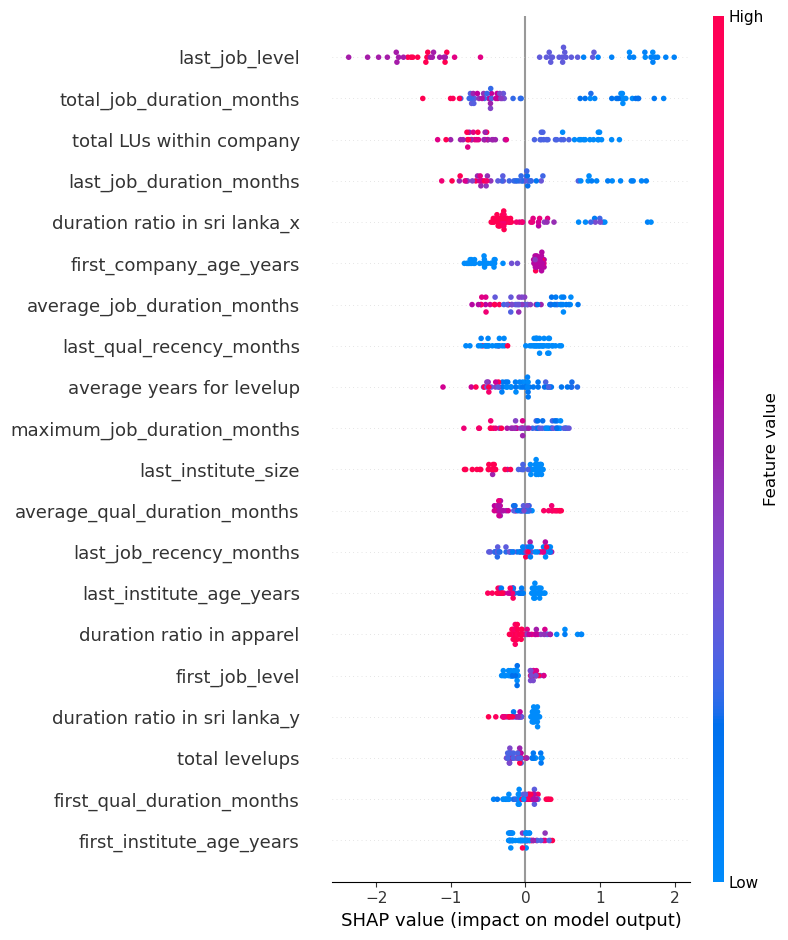

In [31]:
# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("SHAP values:", shap_values[0])

# Summary plot for the first instance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [32]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train)
shap.initjs()

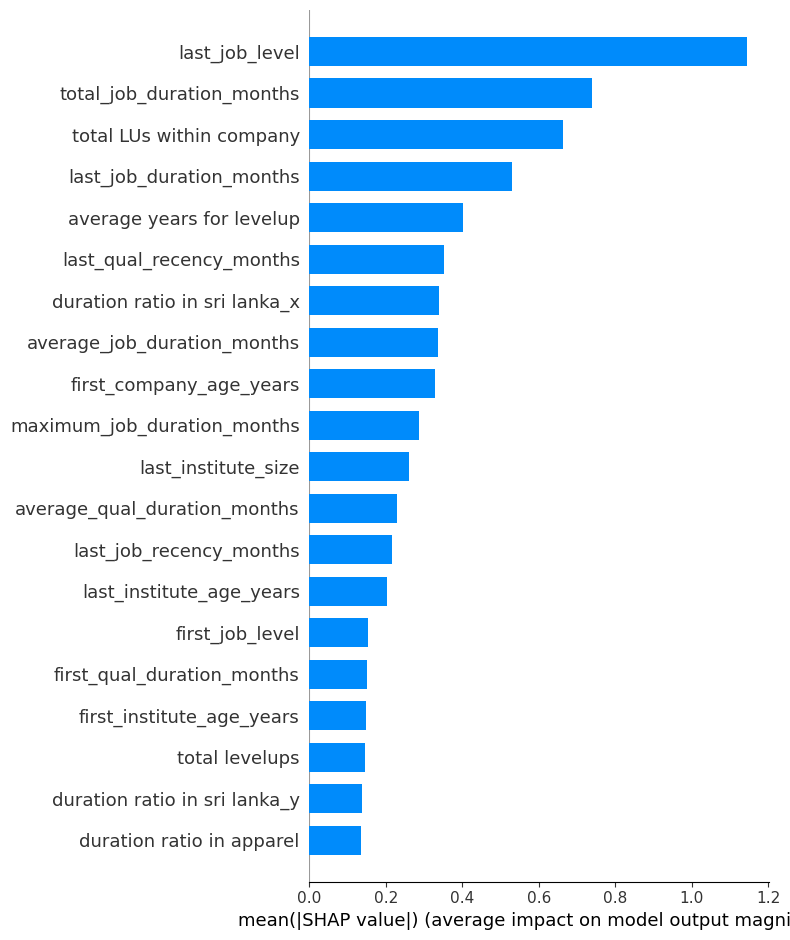

In [33]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [56]:
# Training RFClassifier model
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[178   8]
 [ 33  19]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       186
           1       0.70      0.37      0.48        52

    accuracy                           0.83       238
   macro avg       0.77      0.66      0.69       238
weighted avg       0.81      0.83      0.81       238



In [57]:
rf_param_grid = {
    'n_estimators': [150, 200,250],
    'max_features': [10, 20,30],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4]
}

In [ ]:
# Training RFClassifier model with grid search
train_classification_model(rf_clf, rf_param_grid, X_train, y_train, X_test, y_test)

SHAP values: [[ 2.37310664e-03 -3.75156940e-02  1.84467597e-03 ...  3.36422722e-03
  -2.38900254e-03  8.01836582e-04]
 [-3.32583200e-03 -4.05670013e-02 -6.31628122e-03 ... -8.08500664e-03
  -9.22031456e-04  5.90624510e-03]
 [ 4.63794997e-03  1.41734090e-02  4.55541646e-03 ... -1.54665905e-02
   2.08071108e-03  3.63831260e-03]
 ...
 [-7.01302196e-05  1.52525084e-02  9.04782027e-04 ... -3.01194158e-04
   1.22645655e-03  3.38251251e-03]
 [ 1.20506064e-03 -2.31693774e-02  1.38244476e-02 ... -2.63272756e-02
  -1.25206158e-03  6.75650718e-03]
 [-8.07672690e-03 -8.03659581e-02  6.29644579e-03 ... -8.93275124e-03
   1.92396807e-03  5.13497189e-03]]


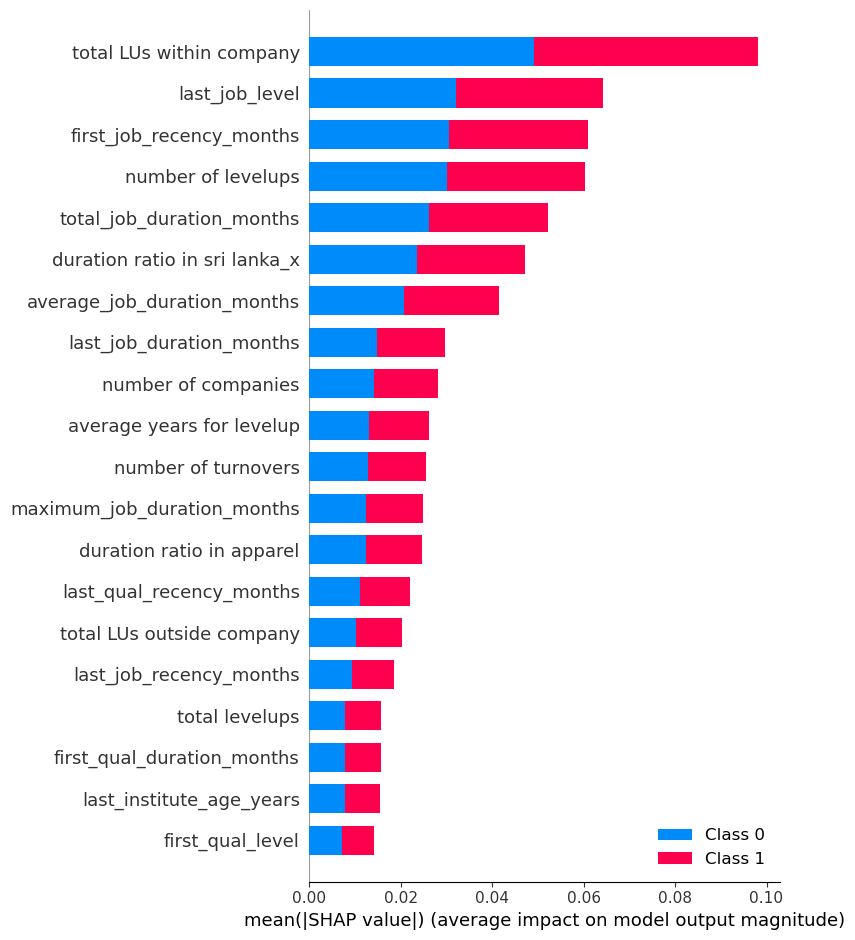

In [58]:
# Create a SHAP explainer
explainer = shap.Explainer(rf_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the SHAP values for the first instance in the test set
print("SHAP values:", shap_values[0])

# Summary plot for the first instance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [59]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train)
shap.initjs()

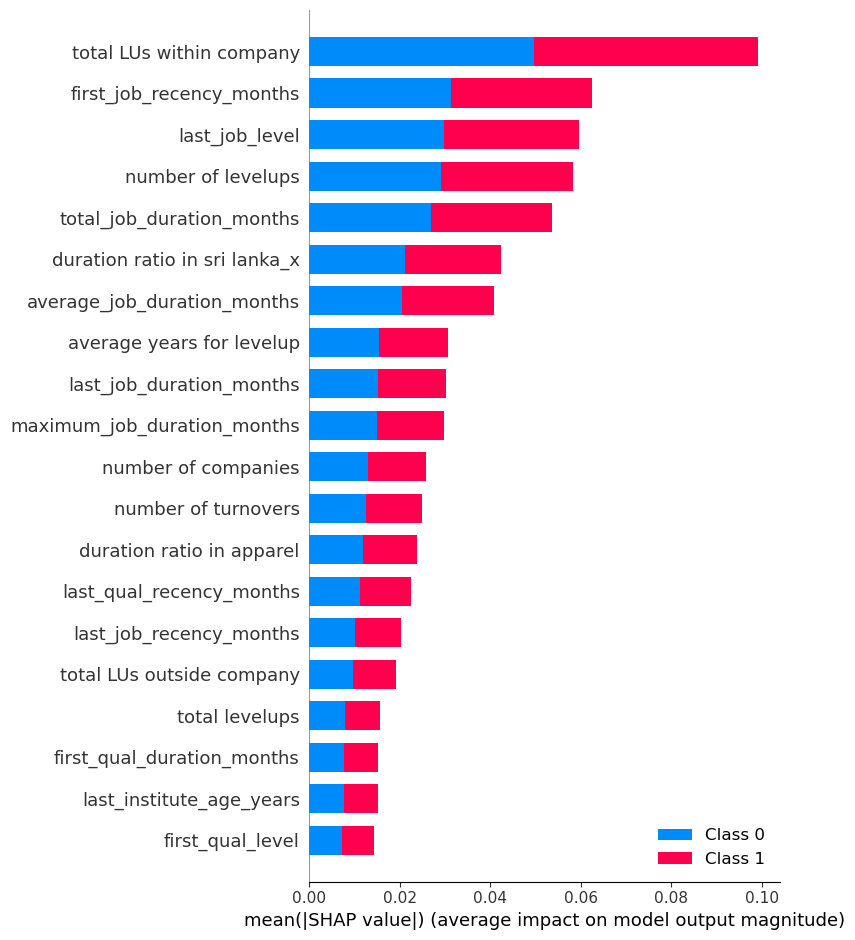

In [60]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [35]:
import pickle
pickle.dump(xgb_clf, open("Churn Model V1.pkl", "wb"))

# Ensemble models for job change classification

In [ ]:
#test the three models with the test data and print their accuracy scores
print("gb: {}".format(gb_clf.score(X_test, y_test)))
print("xgb: {}".format(xgb_clf.score(X_test, y_test)))
print("rf: {}".format(rf_clf.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[("gb", gb_clf), ("xgb", xgb_clf), ("rf", rf_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="soft")

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)